<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/classic/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classic Supervised Regression using Stochastic Gradient Descent

* More information: https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%pylab inline

import matplotlib.pyplot as plt
plt.xkcd()

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn
sklearn.__version__

'0.21.3'

## Linear Regression on Boston House Prices

In [3]:
import sklearn.datasets as data
boston = data.load_boston()
boston.data.shape, boston.target.shape

((506, 13), (506,))

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# median prices of the first 5 suburbs
boston.target[0:4]

array([24. , 21.6, 34.7, 33.4])

In [6]:
# all features of the first 5 suburbs
boston.data[0:4]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00]])

In [0]:
# RM       average number of rooms per dwelling
X = boston.data[:, 5:6]
y = boston.target

In [8]:
# just the prices
X[0:4]

array([[6.575],
       [6.421],
       [7.185],
       [6.998]])

Text(0, 0.5, "price in $1000's")

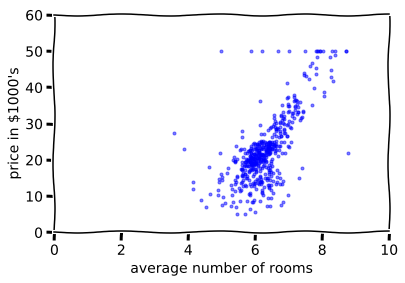

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X, y, marker='.', alpha=0.5, color='blue')
plt.xlim(0, 10) 
plt.ylim(0, 60)
plt.xlabel('average number of rooms')
plt.ylabel('price in $1000\'s')

Text(0, 0.5, "price in $1000's")

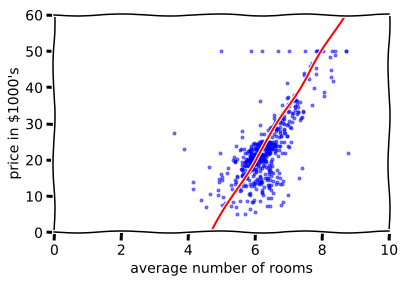

In [10]:
# guessing a line that could fit through that

a = 15.; b = -70.
lx = np.arange(4,10)
lguess = a*lx + b

plt.plot(lx, lguess, c='red')

plt.scatter(X, y, marker='.', alpha=0.5, color='blue')
plt.xlim(0, 10) 
plt.ylim(0, 60)
plt.xlabel('average number of rooms')
plt.ylabel('price in $1000\'s')

## Stochastic Gradient Descent

Uses a loss in relation to the parameter (mean squared error mostly) to optimize the parameters using gradient descent. 

* https://scikit-learn.org/stable/modules/sgd.html
* https://scikit-learn.org/stable/modules/sgd.html#regression
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor

In [11]:
from sklearn.linear_model import SGDRegressor 

est = SGDRegressor()
est

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [12]:
est.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [13]:
est.n_iter_

71

In [14]:
est.coef_

array([5.60231367])

In [15]:
est.intercept_

array([-11.42246212])

Text(0, 0.5, "price in $1000's")

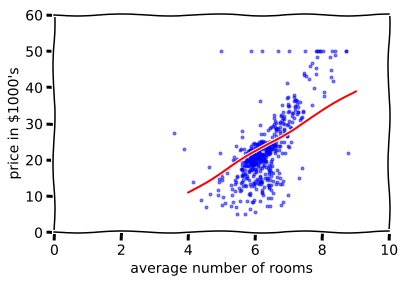

In [16]:
# you can use those as a and b 

a = est.coef_; b = est.intercept_
lx = np.arange(4,10)
lguess = a*lx + b

plt.plot(lx, lguess, c='red')

plt.scatter(X, y, marker='.', alpha=0.5, color='blue')
plt.xlim(0, 10) 
plt.ylim(0, 60)
plt.xlabel('average number of rooms')
plt.ylabel('price in $1000\'s')

In [17]:
# or let the est make a prediction for you

y_pred = est.predict(X)
y_pred[0:4]

array([25.41275028, 24.54999397, 28.83016162, 27.78252896])

Text(0, 0.5, "price in $1000's")

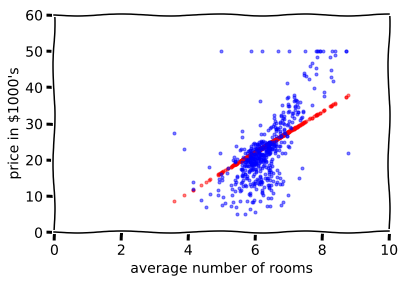

In [18]:

plt.scatter(X, y_pred, marker='.', alpha=0.5, color='red')

plt.scatter(X, y, marker='.', alpha=0.5, color='blue')
plt.xlim(0, 10) 
plt.ylim(0, 60)
plt.xlabel('average number of rooms')
plt.ylabel('price in $1000\'s')

In [19]:
# R2 score, the closer to 1 the better
# loosely speaking: how much better is this than predicting the constant mean
# 0 would mean just as good
# neg. would mean even worse
# https://en.wikipedia.org/wiki/Coefficient_of_determination

est.score(X, y)

0.39343516191383804

In [20]:
# we can do better if we disable early stopping
est = SGDRegressor(tol=None)
est.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [21]:
est.n_iter_

1000

In [22]:
est.score(X, y)

0.47982124669648824

Text(0, 0.5, "price in $1000's")

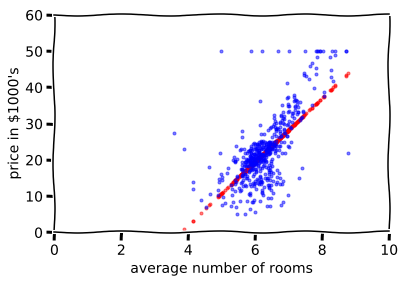

In [23]:
y_pred = est.predict(X)
plt.scatter(X, y_pred, marker='.', alpha=0.5, color='red')

plt.scatter(X, y, marker='.', alpha=0.5, color='blue')
plt.xlim(0, 10) 
plt.ylim(0, 60)
plt.xlabel('average number of rooms')
plt.ylabel('price in $1000\'s')

# Exercise: Choose a different feafure to predict the target

* Execute the notebook up to this point
* what would be a good way to choose a feature that is most promising for a prediction?
* if you want an advice try `crime rate`

## STOP HERE

In [0]:
#         - CRIM     per capita crime rate by town
#         - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#         - INDUS    proportion of non-retail business acres per town
#         - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#         - NOX      nitric oxides concentration (parts per 10 million)
#         - RM       average number of rooms per dwelling
#         - AGE      proportion of owner-occupied units built prior to 1940
#         - DIS      weighted distances to five Boston employment centres
#         - RAD      index of accessibility to radial highways
#         - TAX      full-value property-tax rate per $10,000
#         - PTRATIO  pupil-teacher ratio by town
#         - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#         - LSTAT    % lower status of the population
X = boston.data[:, [0]]
y = boston.target

In [25]:
X[0:4]

array([[0.00632],
       [0.02731],
       [0.02729],
       [0.03237]])

In [26]:
est = SGDRegressor(tol=None)
est.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [27]:
est.score(X, y)

0.1103640493720619

Text(0, 0.5, "price in $1000's")

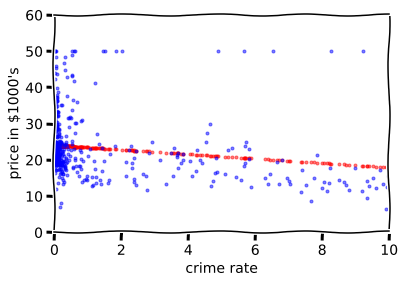

In [28]:
y_pred = est.predict(X)
plt.scatter(X, y_pred, marker='.', alpha=0.5, color='red')

plt.scatter(X, y, marker='.', alpha=0.5, color='blue')
plt.xlim(0, 10) 
plt.ylim(0, 60)
plt.xlabel('crime rate')
plt.ylabel('price in $1000\'s')

In [29]:
X = boston.data[:, [12]]
y = boston.target
est = SGDRegressor(tol=None)
est.fit(X, y)
est.score(X, y)

0.5146151002218257

Text(0, 0.5, "price in $1000's")

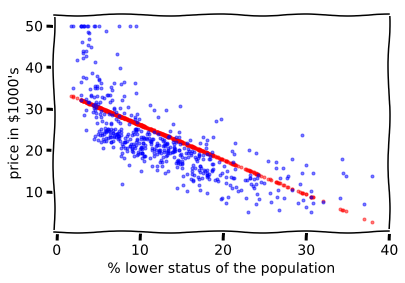

In [30]:
y_pred = est.predict(X)
plt.scatter(X, y_pred, marker='.', alpha=0.5, color='red')

plt.scatter(X, y, marker='.', alpha=0.5, color='blue')
# plt.xlim(0, 10) 
# plt.ylim(0, 60)
plt.xlabel('% lower status of the population')
plt.ylabel('price in $1000\'s')

In [31]:
X = boston.data[:, [10]]
y = boston.target
est = SGDRegressor(tol=None)
est.fit(X, y)
est.score(X, y)

0.13127479314623636

Text(0, 0.5, "price in $1000's")

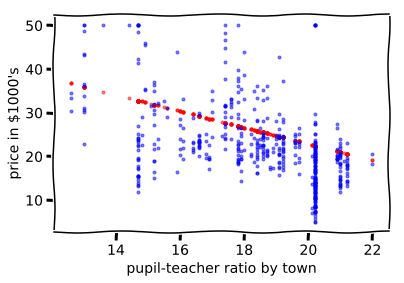

In [32]:
y_pred = est.predict(X)
plt.scatter(X, y_pred, marker='.', alpha=0.5, color='red')

plt.scatter(X, y, marker='.', alpha=0.5, color='blue')
# plt.xlim(0, 10) 
# plt.ylim(0, 60)
plt.xlabel('pupil-teacher ratio by town')
plt.ylabel('price in $1000\'s')

## Apply Regression to our Insurance Example

In [33]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/DJCordhose/ml-workshop/master/notebooks/classic/insurance-customers-1500.csv', sep=';')
df.describe()

,speed,age,miles,group
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,122.492667,44.980667,30.434000,0.998667
std,17.604333,17.130400,15.250815,0.816768
min,68.000000,16.000000,1.000000,0.000000
25%,108.000000,32.000000,18.000000,0.000000
50%,120.000000,42.000000,29.000000,1.000000
75%,137.000000,55.000000,42.000000,2.000000
max,166.000000,100.000000,84.000000,2.000000


In [0]:
X = df[['age']]
y = df[['speed']]

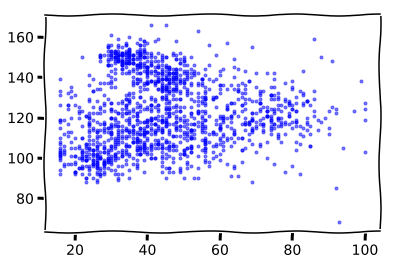

In [35]:
import matplotlib.pyplot as plt

plt.scatter(X, y, marker='.', alpha=0.5, color='blue')


In [36]:
from sklearn.linear_model import SGDRegressor 

est = SGDRegressor(tol=None)
est.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [37]:
est.score(X, y)

-1.8771942318688342

Text(0, 0.5, 'max speed')

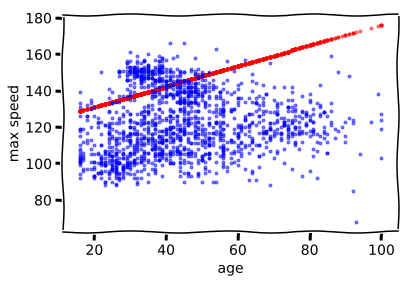

In [38]:
y_pred = est.predict(X)
plt.scatter(X, y_pred, marker='.', alpha=0.5, color='red')

plt.scatter(X, y, marker='.', alpha=0.5, color='blue')
plt.xlabel('age')
plt.ylabel('max speed')

# Exercise: Find a better set of features for regression